## 注释文档



该脚本用于读取CSV文件并绘制不同参数组合下的折线图，主要用于分析量子计算中的门保真度等指标。

1. 导入所需的库
    - turtle: 用于绘图
    - pandas: 用于数据处理
    - matplotlib.pyplot: 用于绘图
    - numpy: 用于数值计算
    - os: 用于文件和目录操作
    - seaborn: 用于美化绘图

2. 读取CSV文件
    - 使用pandas读取数据文件，数据文件路径为'/data/home/scv7454/run/GraduationProject/Data/PXP_scaling_multi_sample.csv'

3. 定义参数字典
    - 包含样本数、演化数、纠缠维度、时间间隔、训练集类型和损失类型等参数

4. 定义绘图所需的变量
    - x轴和y轴的名称列表
    - 演化数和训练集类型的列表

5. 定义数据类型
    - 为数据框中的每一列定义数据类型

6. 绘制折线图
    - 对于每个y轴变量，创建一个新的图形
    - 遍历训练集类型和演化数，过滤数据并计算均值和标准差
    - 绘制带有误差线的折线图，并进行线性拟合
    - 保存图形到指定路径

7. 绘制斜率图
    - 对演化数取对数并进行线性拟合
    - 绘制原始斜率和拟合曲线，并保存图形

注意：在绘图过程中，所有生成的图形都会保存到'/data_frame/home/scv7454/run/GraduationProject/pics/PXP/LineChartOfLength/{}/'目录下。

In [8]:
import itertools

def get_unrecognized_columns(data_frame):
    # import pandas as pd

    # # 读取CSV文件
    # data_frame = pd.read_csv(file_path)

    # 定义已知的列名
    known_columns = [
        'model_name','length','evol_num','sample_num',
        'time_interval','loss_type','data_type',
        'J','delta','lambda',
        'train_loss','test_loss','train_fide','test_fide',
        'gate_fidelity','similarity','spectrum_diff','H_diff'

    ]

    # 定义数据列名
    data_columns = [
        'train_loss','test_loss','train_fide','test_fide',
        'gate_fidelity','similarity','spectrum_diff','H_diff'
    ]

    # 获取未识别的列名
    unrecognized_columns = [col for col in data_frame.columns if col not in known_columns]

    # 分析已知列的不同值
    unique_values = {col: data_frame[col].unique().tolist() for col in data_frame.columns if col not in data_columns}

    return unrecognized_columns, unique_values

# Example usage:
import pandas as pd
df = pd.read_csv('/data/home/scv7454/run/GraduationProject/Data/xorX_(J=1.0)(delta=0.1)(lambda=1.0).csv')
unrecognized_cols, unique_vals = get_unrecognized_columns(df)
print(unrecognized_cols)
print(unique_vals)

# 获取所有键的值组合
# unique_vals.remove('sample_num')
def generate_combinations(unique_vals, x_axis='sample_num'):
    if x_axis in unique_vals:
        unique_vals.pop(x_axis)
    
    different_key = []
    for key, value in unique_vals.items():
        if len(value) > 1:
            different_key.append(key)
    
    values_list = unique_vals.values()
    keys_list = unique_vals.keys()
    combinations = list(itertools.product(*values_list))

    # 创建字典的列表以存储组合
    combinations_dict_list = []
    for combo in combinations:
        combo_dict = {key: value for key, value in zip(keys_list, combo)}
        combinations_dict_list.append(combo_dict)
    
    return combinations_dict_list, different_key

# Example usage:
combinations_dict_list, different_key = generate_combinations(unique_vals)

for comb in combinations_dict_list:
    print(comb)
print(different_key)

[]
{'model_name': ['xorX'], 'length': [10.0], 'evol_num': [1.0], 'sample_num': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0], 'time_interval': [0.02, 0.2], 'loss_type': ['fidelity', 'multi_mags'], 'data_type': ['RK', 'eig', 'linear_scar', 'non_product', 'product', 'xorX'], 'J': [1.0], 'delta': [0.1], 'lambda': [1.0]}
{'model_name': 'xorX', 'length': 10.0, 'evol_num': 1.0, 'time_interval': 0.02, 'loss_type': 'fidelity', 'data_type': 'RK', 'J': 1.0, '

/tmp/ipykernel_41895/3016173757.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RK_column.rename(columns={'lambda': 'lamda'}, inplace=True)


{'model_name': ['xorX'], 'length': [10.0], 'evol_num': [1.0], 'sample_num': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0], 'time_interval': [0.02], 'loss_type': ['multi_mags'], 'data_type': ['linear_scar', 'non_product', 'product', 'RK'], 'J': [1.0], 'delta': [0.1], 'lamda': [1.0]}


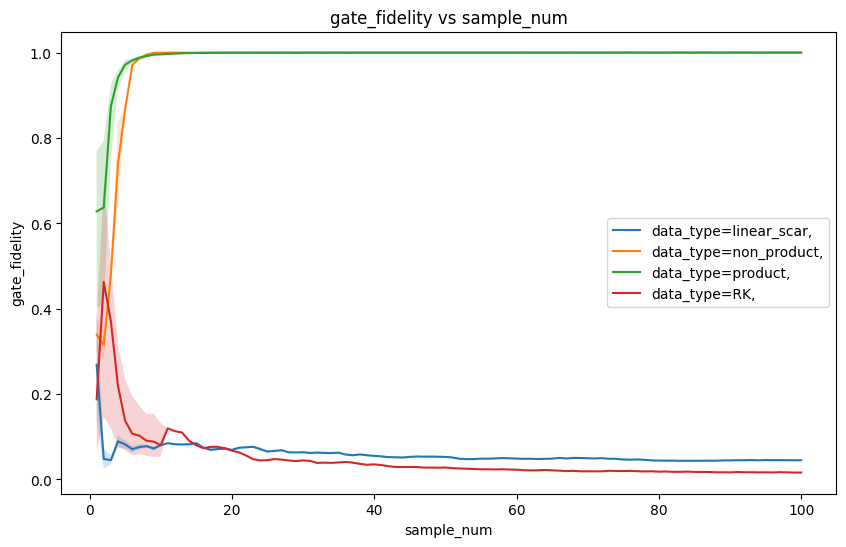

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from sympy import group

def plot_data_custom(fig, data_frame, para_dict, x_axis, y_axis, label_list, y_error=None):
    # 获取当前的 Axes
    ax = fig.gca()

    data = data_frame.copy()
    # 根据para_dict筛选数据
    for key, value in para_dict.items():
        data = data[data[key] == value]


    label = ''
    for key in label_list:
        label += f'{key}={para_dict[key]},'
    label.rstrip()
    
    # 计算每个 x 对应的 y 的均值和标准差
    grouped_data = data.groupby(x_axis)[y_axis].agg(['mean', 'max', 'min']).reset_index()
    grouped_data['error'] = grouped_data['max'] - grouped_data['min']

    # 绘制均值和误差线
    ax.plot(grouped_data[x_axis], grouped_data['mean'], 
                # marker='o', 
                label=label)
    ax.fill_between(grouped_data[x_axis], grouped_data['max'], grouped_data['min'], 
                   alpha=0.2)


    # # 在指定的 Axes 上绘制图形
    # if y_error is not None:
    #     ax.errorbar(data[x_axis], data[y_axis], yerr=y_error, marker='o', label=label, fmt='o')
    # else:
    #     ax.plot(data[x_axis], data[y_axis], marker='o', label=label)
    
    ax.set_title(f'{y_axis} vs {x_axis}')
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    ax.grid()
    ax.legend()  # 显示图例

    # 返回绘制后的 fig 对象
    return fig

# 创建初始图形
fig = plt.figure(figsize=(10, 6))

# 读取CSV文件
folder = '/data/home/scv7454/run/GraduationProject/Data'
file_path = folder + '/xorX_(J=1.0)(delta=0.1)(lambda=1.0).csv'
import pandas as pd
df = pd.read_csv(file_path)
# print(df)

RK_column = df[df['data_type'] == 'RK']
RK_column.rename(columns={'lambda': 'lamda'}, inplace=True)
# print(RK_column)

file_path2 = folder + '/xorX_(J=1.0)(delta=0.1)(lamda=1.0).csv'
df2 = pd.read_csv(file_path2)
# print(df2)

# 合并 RK_column 到 df2 中
merged_df = pd.concat([df2, RK_column], axis=0, ignore_index=True, join='outer')

# Example usage:

unrecognized_cols, unique_vals = get_unrecognized_columns(merged_df)
try:
    # unique_vals['data_type'].remove('eig')
    # unique_vals['data_type'].remove('non_product')
    # unique_vals['time_interval'].remove(0.2)
    # unique_vals['data_type'].remove('xorX')
    # unique_vals['loss_type'].remove('multi_mags')
    unique_vals['loss_type'].remove('fidelity')
    pass
except ValueError as e:
    print(e)
    # print("Value '0.02' not found in 'time_interval'")
print(unique_vals)
combinations_dict_list, different_key = generate_combinations(unique_vals)
# combinations_dict_list = generate_combinations(unique_vals)

for para_dict in combinations_dict_list:
    fig = plot_data_custom(fig, merged_df, para_dict, 'sample_num', 'gate_fidelity', label_list=different_key)

plt.show()  # 最后显示图形
import os
pic_path = '/data/home/scv7454/run/GraduationProject/pics/xorX'
os.makedirs(pic_path, exist_ok=True)
fig.savefig(pic_path+'/gate_fidVSsample_num(loss_multi_mags).svg')

## 观察不同初态下观测量的时间演化

In [10]:
import torch as tc

from Library.PhysModule import multi_mags_from_states
import WorkFlow.TimeEvol

# 计算纠缠熵
def entanglement_entropy(states):
    length = len(states.shape) - 1
    num = states.shape[0]
    shape = [num, int(2**(length/2)), int(2**(length - length/2))]
    states_ = states.reshape(shape)
    spectral = tc.linalg.svdvals(states_)
    entropy_list = []
    for i in range(spectral.shape[0]):
        p_dis = spectral[i][spectral[i] != 0]**2
        entropy = tc.einsum("i,i->", -p_dis, tc.log2(p_dis))
        entropy_list.append(entropy)
    return entropy_list

# 绘制纠缠熵的演化
def draw_entangle_evol(fig:plt.Figure, label:str, states:tc.Tensor, model:str, model_para:dict, evol_para:dict)->plt.Figure:
    entangle_init = entanglement_entropy(states)
    evol_states = WorkFlow.TimeEvol.main(model_name=model, model_para=model_para, init_states=states, evol_para=evol_para)
    entangle_evol = entanglement_entropy(evol_states.squeeze(0))
    ax = fig.gca()
    ax.plot(entangle_init+entangle_evol, label=label)
    ax.set_title(f'Entanglement vs Time')
    ax.set_xlabel('time/(0.02)')
    ax.set_ylabel('Entanglement/ln2')
    ax.grid()
    ax.legend()  # 显示图例
    return fig

# 绘制磁矩的演化
def draw_mag_evol(mag_dir:int, site:int, fig:plt.Figure, label:str, states:tc.Tensor, model:str, model_para:dict, evol_para:dict)->plt.Figure:
    mag_init = multi_mags_from_states(states)
    evol_states = WorkFlow.TimeEvol.main(model_name=model, model_para=model_para, init_states=states, evol_para=evol_para)
    mag_evol = multi_mags_from_states(evol_states.squeeze(0))
    mag_z_3 = tc.cat([mag_init[:, mag_dir, site], mag_evol[:, mag_dir, site]], dim=0)
    print(mag_z_3.shape)
    ax = fig.gca()
    ax.plot(mag_z_3, label=label)
    ax.set_title('Mag_'+chr(120+mag_dir)+' on site '+str(site)+' vs Time')
    ax.set_xlabel('time/(0.02)')
    ax.set_ylabel('Mag_'+chr(120+mag_dir))
    ax.grid(visible=True, which='both', color='gray', linestyle='--', linewidth=0.5)  # 确保网格可见
    ax.legend()  # 显示图例
    return fig

def fidelity(state1, state2):
    '''
    state1.shape = [2, ... , 2]
    state2.shape = [2, ... , 2]
    '''
    state1 = state1.reshape(-1)
    state2 = state2.reshape(-1)
    fide = tc.einsum("i,i->", state1.conj(), state2)
    fide_sqr = fide * fide.conj()
    return fide_sqr

# 绘制与初态保真度的演化
def fidelity_with_init(init_states, evol_states):
    '''
    init_states.shape = [n, 2, ... , 2]
    evol_states.shape = [n, t, 2, ... , 2]
    '''
    n = init_states.shape[0]
    t = evol_states.shape[1]
    fidelity_table = [[None for _ in range(t)] for _ in range(n)]
    for i in range(n):
        init = init_states[i]
        for j in range(t):
            evol = evol_states[i][j]
            fidelity_table[i][j] = fidelity(init, evol)
    return fidelity_table

def draw_fidelity_evol(fig:plt.Figure, label:str, states:tc.Tensor, model:str, model_para:dict, evol_para:dict)->plt.Figure:
    evol_states = WorkFlow.TimeEvol.main(model_name=model, model_para=model_para, init_states=states, evol_para=evol_para)
    fidelity_evol = fidelity_with_init(states, evol_states)
    ax = fig.gca()
    for i in range(len(fidelity_evol)):
        ax.plot(fidelity_evol[i], label=label)
    ax.set_title(f'Fidelity vs Time')
    ax.set_xlabel('time/(0.02)')
    ax.set_ylabel('Fidelity | <psi(t)|psi(0)> |^2')
    ax.grid()
    ax.legend()  # 显示图例
    return fig

In [11]:
model = 'xorX'
dtype = tc.complex128
device = tc.device('cpu')
model_para = {
    'J': 1,
    'delta': 0.1,
    'lamda': 1,
    'length': 10,
}
evol_para = {
    'print_time': 0.02,
    'time_tot': 2,
    'tau': 0.02,
    'device': device,
    'dtype': dtype
}
from WorkFlow import InitStates
init_para = {
    'type': 'RK',
    'length': 10,
    'number': 1,
    'device': device,
    'dtype': dtype,
    'ksi_bar': 0.5,
}
init_para = dict(init_para, **model_para)

### 计算不同初态保真度的时间演化

torch.Size([1, 1024])


/data/home/scv7454/.conda/envs/myname/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


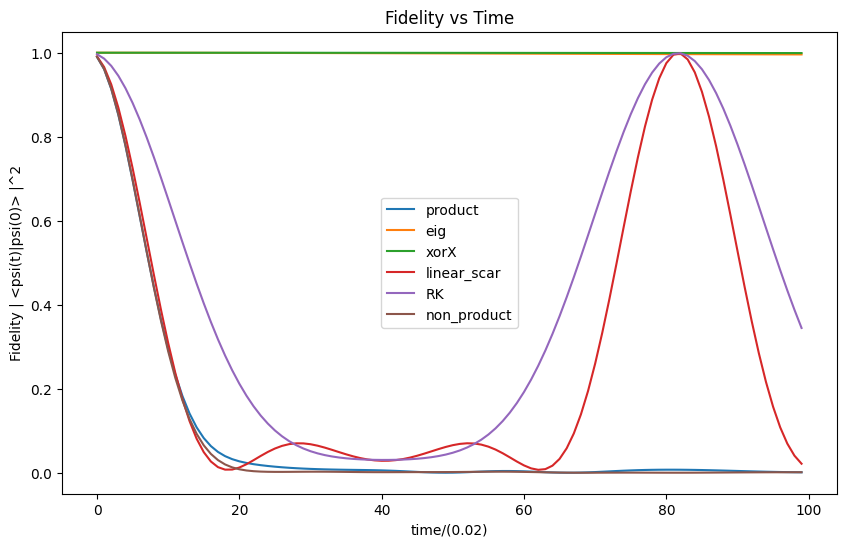

In [12]:
init_type = ['product', 'eig', 'xorX', 'linear_scar', 'RK', 'non_product']
fig = plt.figure(figsize=(10, 6))
for type in init_type:
    init_para['type'] = type
    init_state = InitStates.main(init_para)
    fig = draw_fidelity_evol(fig=fig, label=type, states=init_state, model=model, model_para=model_para, evol_para=evol_para)

plt.show()
fig.savefig(pic_path + '/fidelity_evol.svg')

### 计算不同初态磁矩的时间演化

torch.Size([1, 1024])
torch.Size([101])


/data/home/scv7454/.conda/envs/myname/lib/python3.9/site-packages/torch/_tensor.py:680: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


torch.Size([101])
torch.Size([101])
torch.Size([101])
torch.Size([101])
torch.Size([101])


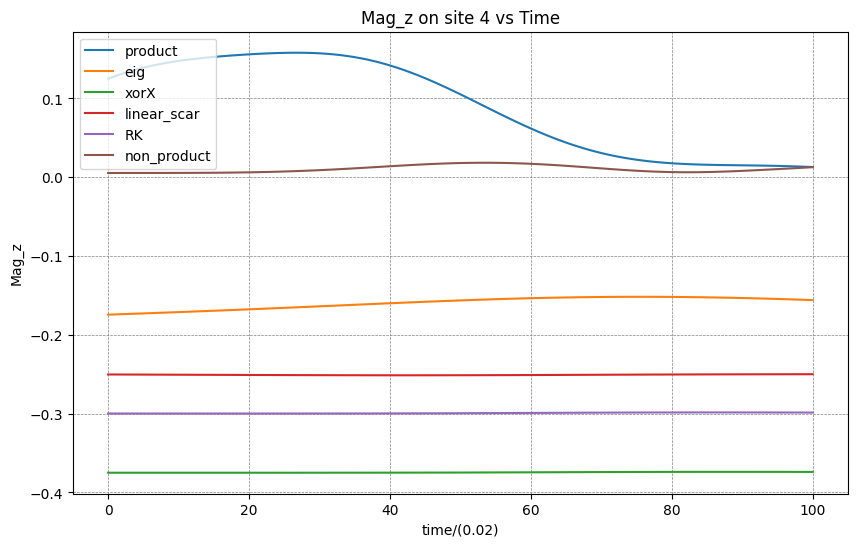

In [13]:
init_type = ['product', 'eig', 'xorX', 'linear_scar', 'RK', 'non_product']
fig = plt.figure(figsize=(10, 6))
for type in init_type:
    init_para['type'] = type
    init_state = InitStates.main(init_para)
    fig = draw_mag_evol(mag_dir=2, site=4, fig=fig, label=type, states=init_state, model=model, model_para=model_para, evol_para=evol_para)

plt.show()
fig.savefig(pic_path + '/mag_z_evol.svg')

### 计算不同初态纠缠熵的时间演化

torch.Size([1, 1024])


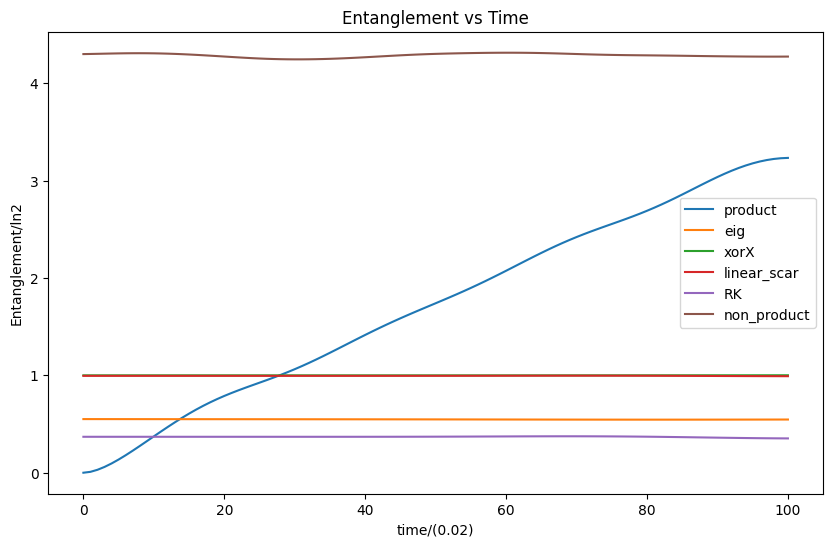

In [14]:
init_type = ['product', 'eig', 'xorX', 'linear_scar', 'RK', 'non_product']
fig = plt.figure(figsize=(10, 6))
for type in init_type:
    init_para['type'] = type
    init_state = InitStates.main(init_para)
    fig = draw_entangle_evol(fig=fig, label=type, states=init_state, model=model, model_para=model_para, evol_para=evol_para)

plt.show()
fig.savefig(pic_path + '/entangle_evol.svg')